# 决策树

## 【关键词】树，信息增益

### 决策树的优缺点

优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。既能用于分类，也能用于回归

缺点：可能会产生过度匹配问题


## 一、决策树的原理

### predict()

【二十个问题的游戏】

游戏的规则很简单：参与游戏的一方在脑海里想某个事物，其他参与者向他提问题，只允许提20个问题，问题的答案也只能用对或错回答。问问题的人通过推断分解，逐步缩小待猜测事物的范围。决策树的工作原理与20个问题类似，用户输人一系列数据 ，然后给出游戏的答案。

我们经常使用决策树处理分类问题。近来的调查表明决策树也是最经常使用的数据挖掘算法。它之所以如此流行，一个很重要的原因就是使用者基本上不用了解机器学习算法，也不用深究它是如何工作的。

如果以前没有接触过决策树，完全不用担心，它的概念非常简单。即使不知道它也可以通过简单的图形了解其工作原理。

决策树分类的思想类似于找对象。现想象一个女孩的母亲要给这个女孩介绍男朋友，于是有了下面的对话：

      女儿：多大年纪了？

      母亲：26。

      女儿：长的帅不帅？

      母亲：挺帅的。

      女儿：收入高不？

      母亲：不算很高，中等情况。

      女儿：是公务员不？

      母亲：是，在税务局上班呢。

      女儿：那好，我去见见。
      
这个女孩的决策过程就是典型的分类树决策。相当于通过年龄、长相、收入和是否公务员对将男人分为两个类别：见和不见。假设这个女孩对男人的要求是：30岁以下、长相中等以上并且是高收入者或中等以上收入的公务员，那么这个可以用下图表示女孩的决策逻辑:

![](./img/1.png)

上图完整表达了这个女孩决定是否见一个约会对象的策略，其中绿色节点表示判断条件，橙色节点表示决策结果，箭头表示在一个判断条件在不同情况下的决策路径，图中红色箭头表示了上面例子中女孩的决策过程。

这幅图基本可以算是一颗决策树，说它“基本可以算”是因为图中的判定条件没有量化，如收入高中低等等，还不能算是严格意义上的决策树，如果将所有条件量化，则就变成真正的决策树了。

有了上面直观的认识，我们可以正式定义决策树了：

决策树（decision tree）是一个树结构（可以是二叉树或非二叉树）。其每个非叶节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，而每个叶节点存放一个类别。使用决策树进行决策的过程就是从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

可以看到，决策树的决策过程非常直观，容易被人理解。目前决策树已经成功运用于医学、制造产业、天文学、分支生物学以及商业等诸多领域。

之前介绍的K-近邻算法可以完成很多分类任务，但是它最大的缺点就是无法给出数据的内在含义，决策树的主要优势就在于数据形式非常容易理解。

决策树算法能够读取数据集合，构建类似于上面的决策树。决策树很多任务都是为了数据中所蕴含的知识信息，因此决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，机器学习算法最终将使用这些机器从数据集中创造的规则。专家系统中经常使用决策树，而且决策树给出结果往往可以匹敌在当前领域具有几十年工作经验的人类专家。

知道了决策树的定义以及其应用方法，下面介绍决策树的构造算法。

## 二、决策树的构造

#### 分类解决离散问题，回归解决连续问题

- 决策树：信息论
- 逻辑斯底回归、贝叶斯：概率论

不同于逻辑斯蒂回归和贝叶斯算法，决策树的构造过程不依赖领域知识，它使用属性选择度量来选择将元组最好地划分成不同的类的属性。所谓决策树的构造就是进行属性选择度量确定各个特征属性之间的拓扑结构。

构造决策树的关键步骤是分裂属性。所谓分裂属性就是在某个节点处按照某一特征属性的不同划分构造不同的分支，其目标是让各个分裂子集尽可能地“纯”。尽可能“纯”就是尽量让一个分裂子集中待分类项属于同一类别。分裂属性分为三种不同的情况：

      1、属性是离散值且不要求生成二叉决策树。此时用属性的每一个划分作为一个分支。

      2、属性是离散值且要求生成二叉决策树。此时使用属性划分的一个子集进行测试，按照“属于此子集”和“不属于此子集”分成两个分支。

      3、属性是连续值。此时确定一个值作为分裂点split_point，按照>split_point和<=split_point生成两个分支。

构造决策树的关键性内容是进行属性选择度量，属性选择度量是一种选择分裂准则，它决定了拓扑结构及分裂点split_point的选择。

属性选择度量算法有很多，一般使用自顶向下递归分治法，并采用不回溯的贪心策略。这里介绍常用的ID3算法。

#### ID3算法

划分数据集的大原则是：*将无序的数据变得更加有序。*

我们可以使用多种方法划分数据集，但是每种方法都有各自的优缺点。组织杂乱无章数据的一种方法就是使用信息论度量信息，信息论是量化处理信息的分支科学。我们可以在划分数据之前使用信息论量化度量信息的内容。

在划分数据集之前之后信息发生的变化称为信息增益，知道如何计算信息增益，我们就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。

在可以评测哪种数据划分方式是最好的数据划分之前，我们必须学习如何计算信息增益。集合信息的度量方式称为香农熵或者简称为熵，这个名字来源于信息论之父克劳德•香农。

entropy

熵定义为信息的期望值，在明晰这个概念之前，我们必须知道信息的定义。如果待分类的事务可能划分在多个分类之中，则符号x的信息定义为：

![](./img/2.png)

其中p(x)是选择该分类的概率

为了计算熵，我们需要计算所有类别所有可能值包含的信息期望值，通过下面的公式得到：

![3.PNG](./img/3.png)

其中n是分类的数目。

在决策树当中，设D为用类别对训练元组进行的划分，则D的熵（entropy）表示为：

![4.gif](./img/4.gif)

其中pi表示第i个类别在整个训练元组中出现的概率，可以用属于此类别元素的数量除以训练元组元素总数量作为估计。熵的实际意义表示是D中元组的类标号所需要的平均信息量。

现在我们假设将训练元组D按属性A进行划分，则A对D划分的期望信息为：

![5.gif](./img/5.gif)

而信息增益即为两者的差值：

![6.gif](./img/6.gif)

ID3算法就是在每次需要分裂时，计算每个属性的增益率，然后选择增益率最大的属性进行分裂。下面我们继续用SNS社区中不真实账号检测的例子说明如何使用ID3算法构造决策树。为了简单起见，我们假设训练集合包含10个元素：

![7.png](./img/7.png)

其中s、m和l分别表示小、中和大。

设L、F和H表示日志密度、好友密度、是否使用真实头像，下面计算各属性的信息增益。

![8.gif](./img/8.gif)
![9.gif](./img/9.gif)
![10.gif](./img/10.gif)

因此日志密度的信息增益是0.276。

用同样方法得到F和H的信息增益分别为0.553和0.033。

因为F具有最大的信息增益，所以第一次分裂选择F为分裂属性，分裂后的结果如下图表示：

![11.png](./img/11.png)

在上图的基础上，再递归使用这个方法计算子节点的分裂属性，最终就可以得到整个决策树。


### 练习
计算上图的信息熵，确定下一个分类的特征

In [5]:
import math
-(0.5*math.log2(0.5)+0.5*math.log2(0.5))  # 模棱两可
-(0.9*math.log2(0.9)+0.1*math.log2(0.1))
-(0.999*math.log2(0.999)+0.001*math.log2(0.001))  # 不确定性以及很小了
-(1*math.log2(1))

-0.0

In [6]:
# 判断账号是否真实的系统中，信息的熵
# n - 3 p1 = 3/10
# y - 7 p2 = 7/10
# 计算这个系统中的信息熵
-((3/10)*math.log2(3/10)+(7/10)*math.log2(7/10))

0.8812908992306927

In [8]:
inof_D = -((3/10)*math.log2(3/10)+(7/10)*math.log2(7/10))
inof_D  # 当前系统的信息熵

0.8812908992306927

In [10]:
# 求 依据日志密度判断 帐号是否真实 的 信息熵
# s - 3 p=0.3   n y n
# m - 4 p=0.4   y y n y
# l - 3 p=0.3   y y y
info_L_D = -0.3*((2/3)*math.log2(2/3)+(1/3)*math.log2(1/3))-0.4*((1/4)*math.log2(1/4)+(3/4)*math.log2(3/4))-0.3*(math.log2(1))
info_L_D

0.6

In [12]:
inof_D-info_L_D  # 日志密度这个特征 带来的 信息增益

0.2812908992306927

In [16]:
# 求 依据好友密度判断 帐号是否真实 的 信息熵
# s - 4 p=0.4 n n y n
# m - 4 p=0.4 y y y y
# l - 2 p=0.2 y y

info_F_D = -0.4*((3/4)*math.log2(3/4)+(1/4)*math.log2(1/4))
info_F_D

0.32451124978365314

In [17]:
inof_D-info_F_D  # 好友密度带来的信息增益就很大了

0.5567796494470396

In [ ]:
# 通过 上述算法 可以计算每个特征 带来的信息增益
# 然后 优先以 信息增益大的 特征 对 样本进行分类

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()  # 创建一个决策树模型

In [20]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [22]:
# 留着吧
# 日志密度 s m l 0 1 2
# 好友密度 s m l 0 1 2
# 头像     n y   0 1

# m s n
# l m n
# m s n
# s s y

# 1 0 0
# 2 1 0
# 1 0 0
# 0 0 1

X_train = np.array([
    [0,0,0],
    [0,2,1],
    [2,1,1],
    [1,1,1],
    [2,1,1],
    [1,2,0],
    [1,0,0],
    [2,1,0],
    [1,0,0],
    [0,0,1],
])
y_train = np.array([0,1,1,1,1,1,0,1,1,0])

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
dtree.predict([
    [0,0,0],  # 日志密度低 好友密度低 头像是假的
    [0,1,0],   # 日志密度低 好友密度中等 头像是假的  好友密度这个条件还可以 其他条件都不好
    [2,0,1]  # 其他条件都很好 就是好友密度不好
])
# 优先以信息增益大的条件去决定分类

array([0, 1, 0])

## 三、实战

【注意】
参数max_depth越大，越容易过拟合

导包

In [29]:
# 导入 数据集 和 模型 knn lgc dtree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  # 虽然名字里有回归 但是是用来分类的
from sklearn.tree import DecisionTreeClassifier

In [30]:
from sklearn.datasets import load_iris

### 1、使用自带的iris数据集

In [32]:
iris = load_iris()

In [36]:
# 这里只是 获取一下前两个特征 进行分类 然后绘图 让大家看下不同模型的差异即可
data = iris.data[:,:2]  # 特征
target = iris.target  # 目标值

In [ ]:
# 先画图看看效果

无需切分训练集和测试集 取出前两个特征绘图看分类效果

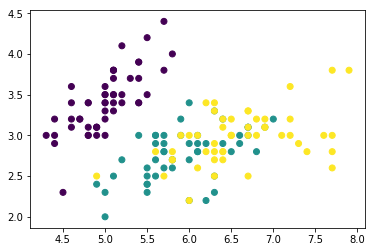

In [38]:
plt.scatter(data[:,0],data[:,1],c=target)

使用决策树算法

In [71]:
2**6

64

In [72]:
# max_depth=None 最大深度 其实就是 决策树 决策的次数
dtree = DecisionTreeClassifier(max_depth=6)  # 深度太小 容易欠拟合  深度太大 容易过拟合 

In [73]:
dtree.fit(data,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# 把整个坐标系 取遍 看分界
# dtree.predict()

In [44]:
# 范围
xmin = data[:,0].min() - 0.5
xmax = data[:,0].max() + 0.5
ymin = data[:,1].min() - 0.5
ymax = data[:,1].max() + 0.5

In [47]:
# 取遍范围
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
# 网格化处理x和y 让他们做交叉
xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.flatten(),yy.flatten()]  # 画布上的每一个点

In [74]:
# 使用X_test去预测
y_ = dtree.predict(X_test)

In [53]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['r','g','b'])

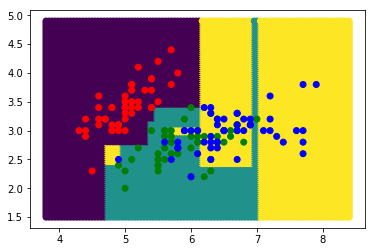

In [75]:
# 绘图
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap=cmap1)  # 先画背景 后画点

使用KNN算法

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
y_ = knn.predict(X_test)

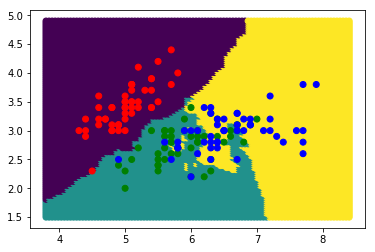

In [79]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap=cmap1)  # knn容易过拟合

使用逻辑斯蒂回归算法

In [80]:
lgc = LogisticRegression()

In [81]:
lgc.fit(data,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_ = lgc.predict(X_test)

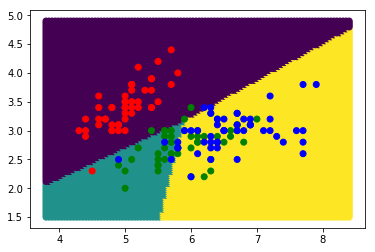

In [84]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap=cmap1)   # 逻辑回归容易欠拟合

In [85]:
# 处理分类问题
# 有明确的业务逻辑（反映到图上 是 很规整的散点） 这个时候适合用决策树
# knn(容易过拟合)和lgc（容易欠拟合）
# 能不用knn 尽量不用knn 速度太慢 内存消耗太大

### 2、使用回归预测一个椭圆

在-np.pi到np.pi的范围 中 产生200个点

生成正弦值和余弦值

然后根据正弦值和余弦值产生目标值

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
X_train = np.linspace(-np.pi,np.pi,200)
X_train

array([-3.14159265, -3.11001886, -3.07844506, -3.04687127, -3.01529747,
       -2.98372368, -2.95214988, -2.92057608, -2.88900229, -2.85742849,
       -2.8258547 , -2.7942809 , -2.76270711, -2.73113331, -2.69955952,
       -2.66798572, -2.63641193, -2.60483813, -2.57326433, -2.54169054,
       -2.51011674, -2.47854295, -2.44696915, -2.41539536, -2.38382156,
       -2.35224777, -2.32067397, -2.28910017, -2.25752638, -2.22595258,
       -2.19437879, -2.16280499, -2.1312312 , -2.0996574 , -2.06808361,
       -2.03650981, -2.00493602, -1.97336222, -1.94178842, -1.91021463,
       -1.87864083, -1.84706704, -1.81549324, -1.78391945, -1.75234565,
       -1.72077186, -1.68919806, -1.65762426, -1.62605047, -1.59447667,
       -1.56290288, -1.53132908, -1.49975529, -1.46818149, -1.4366077 ,
       -1.4050339 , -1.3734601 , -1.34188631, -1.31031251, -1.27873872,
       -1.24716492, -1.21559113, -1.18401733, -1.15244354, -1.12086974,
       -1.08929595, -1.05772215, -1.02614835, -0.99457456, -0.96

In [101]:
s = np.sin(X_train)
c = np.cos(X_train)
target = np.c_[s,c]

In [103]:
target

array([[-1.22464680e-16, -1.00000000e+00],
       [-3.15685498e-02, -9.99501589e-01],
       [-6.31056313e-02, -9.98006853e-01],
       [-9.45798078e-02, -9.95517283e-01],
       [-1.25959705e-01, -9.92035359e-01],
       [-1.57214043e-01, -9.87564552e-01],
       [-1.88311666e-01, -9.82109320e-01],
       [-2.19221577e-01, -9.75675100e-01],
       [-2.49912962e-01, -9.68268305e-01],
       [-2.80355229e-01, -9.59896320e-01],
       [-3.10518032e-01, -9.50567489e-01],
       [-3.40371303e-01, -9.40291112e-01],
       [-3.69885285e-01, -9.29077433e-01],
       [-3.99030558e-01, -9.16937628e-01],
       [-4.27778068e-01, -9.03883800e-01],
       [-4.56099159e-01, -8.89928962e-01],
       [-4.83965601e-01, -8.75087022e-01],
       [-5.11349616e-01, -8.59372777e-01],
       [-5.38223906e-01, -8.42801891e-01],
       [-5.64561683e-01, -8.25390881e-01],
       [-5.90336692e-01, -8.07157104e-01],
       [-6.15523241e-01, -7.88118735e-01],
       [-6.40096223e-01, -7.68294752e-01],
       [-6.

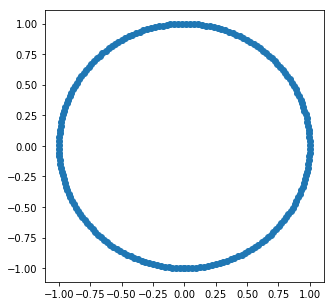

In [102]:
plt.figure(figsize=(5,5))
plt.scatter(target[:,0],target[:,1])

撒盐操作，让圆上的40个点不规则的显示在圆的周围

In [106]:
noise = np.random.randn(40,2)/10  # 40行2列

In [107]:
target[::5] += noise

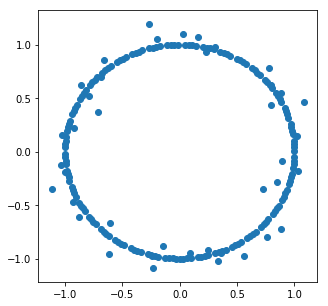

In [108]:
plt.figure(figsize=(5,5))
plt.scatter(target[:,0],target[:,1])

创建不同深度的决策树  
进行数据训练

In [109]:
dtree = DecisionTreeRegressor()

In [111]:
X_train

array([-3.14159265, -3.11001886, -3.07844506, -3.04687127, -3.01529747,
       -2.98372368, -2.95214988, -2.92057608, -2.88900229, -2.85742849,
       -2.8258547 , -2.7942809 , -2.76270711, -2.73113331, -2.69955952,
       -2.66798572, -2.63641193, -2.60483813, -2.57326433, -2.54169054,
       -2.51011674, -2.47854295, -2.44696915, -2.41539536, -2.38382156,
       -2.35224777, -2.32067397, -2.28910017, -2.25752638, -2.22595258,
       -2.19437879, -2.16280499, -2.1312312 , -2.0996574 , -2.06808361,
       -2.03650981, -2.00493602, -1.97336222, -1.94178842, -1.91021463,
       -1.87864083, -1.84706704, -1.81549324, -1.78391945, -1.75234565,
       -1.72077186, -1.68919806, -1.65762426, -1.62605047, -1.59447667,
       -1.56290288, -1.53132908, -1.49975529, -1.46818149, -1.4366077 ,
       -1.4050339 , -1.3734601 , -1.34188631, -1.31031251, -1.27873872,
       -1.24716492, -1.21559113, -1.18401733, -1.15244354, -1.12086974,
       -1.08929595, -1.05772215, -1.02614835, -0.99457456, -0.96

In [112]:
dtree.fit(X_train.reshape(-1,1),target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

对数据进行预测

In [115]:
X_test = np.linspace(-np.pi,np.pi,180)
X_test

array([-3.14159265, -3.10649106, -3.07138947, -3.03628787, -3.00118628,
       -2.96608468, -2.93098309, -2.8958815 , -2.8607799 , -2.82567831,
       -2.79057671, -2.75547512, -2.72037353, -2.68527193, -2.65017034,
       -2.61506875, -2.57996715, -2.54486556, -2.50976396, -2.47466237,
       -2.43956078, -2.40445918, -2.36935759, -2.33425599, -2.2991544 ,
       -2.26405281, -2.22895121, -2.19384962, -2.15874802, -2.12364643,
       -2.08854484, -2.05344324, -2.01834165, -1.98324006, -1.94813846,
       -1.91303687, -1.87793527, -1.84283368, -1.80773209, -1.77263049,
       -1.7375289 , -1.7024273 , -1.66732571, -1.63222412, -1.59712252,
       -1.56202093, -1.52691933, -1.49181774, -1.45671615, -1.42161455,
       -1.38651296, -1.35141136, -1.31630977, -1.28120818, -1.24610658,
       -1.21100499, -1.1759034 , -1.1408018 , -1.10570021, -1.07059861,
       -1.03549702, -1.00039543, -0.96529383, -0.93019224, -0.89509064,
       -0.85998905, -0.82488746, -0.78978586, -0.75468427, -0.71

In [117]:
y_ = dtree.predict(X_test.reshape(-1,1))

显示图片

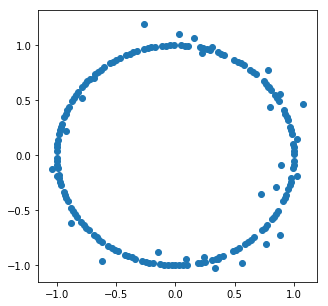

In [119]:
plt.figure(figsize=(5,5))
plt.scatter(y_[:,0],y_[:,1])

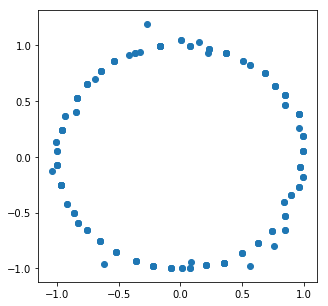

In [129]:
# 
dtree = DecisionTreeRegressor(max_depth=6)  # 深度小 欠拟合  深度大 过拟合
dtree.fit(X_train.reshape(-1,1),target)
y_ = dtree.predict(X_test.reshape(-1,1))
plt.figure(figsize=(5,5))
plt.scatter(y_[:,0],y_[:,1])  # 回归很少用决策树

思考：给你一个样本和目标值，通过代码计算各个特征的信息增益